### LPPLS Demo
https://github.com/Boulder-Investment-Technologies/lppls

In [ ]:
##RUN IF NEEDED (FIRST TIME)
## %pip install lppls
## %pip install xarray

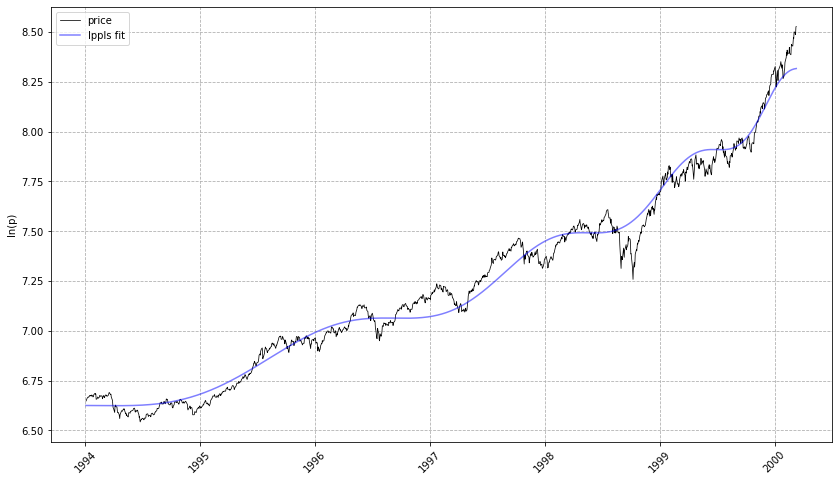

In [1]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt

import matplotlib.pyplot as plt

%matplotlib inline

# read example dataset into df 
data = data_loader.nasdaq_dotcom()

# convert time to ordinal
time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']]

# create list of observation data
price = np.log(data['Adj Close'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# visualize the fit
lppls_model.plot_fit()


